In [1]:
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


### Simple autoencoder

In [2]:
# encoding dim is the size of representation vector, which is reduced.
encoding_dim = 32 # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

In [3]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)
encoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [0]:
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
# Decoder Model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [5]:
decoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 25,872
Trainable params: 25,872
Non-trainable params: 0
_________________________________________________________________


In [6]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
(x_train,_), (x_test, _) = mnist.load_data() # In this case, we don't use x_labels, y_labels because we're interested in encoding and decoding the input_img.


In [8]:
print(x_train.shape)
print(x_train[0].shape)

(60000, 28, 28)
(28, 28)


In [9]:
# Normalize and convert 28 x 28 to 784.
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [10]:
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))




Train on 60000 samples, validate on 10000 samples
Epoch 1/50





60000/60000 [==============================] - 2s 40us/step - loss: 0.3717 - val_loss: 0.2721
Epoch 2/50
60000/60000 [==============================] - 1s 20us/step - loss: 0.2662 - val_loss: 0.2569
Epoch 3/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.2451 - val_loss: 0.2310
Epoch 4/50
60000/60000 [==============================] - 1s 20us/step - loss: 0.2218 - val_loss: 0.2113
Epoch 5/50
60000/60000 [==============================] - 1s 20us/step - loss: 0.2058 - val_loss: 0.1983
Epoch 6/50
60000/60000 [==============================] - 1s 20us/step - loss: 0.1948 - val_loss: 0.1889
Epoch 7/50
60000/60000 [==============================] - 1s 20us/step - loss: 0.1864 - val_loss: 0.1815
Epoch 8/50
60000/60000 [==============================] - 1s 20us/step - loss: 0.1797 - val_loss: 0.1755
Epoch 9/50
60000/60000 [==============================] - 1s 20us/step - loss: 0.1743 - val_loss: 0.17

In [0]:
# encoding / decoding the numbers
# note that the numbers came from test set.

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

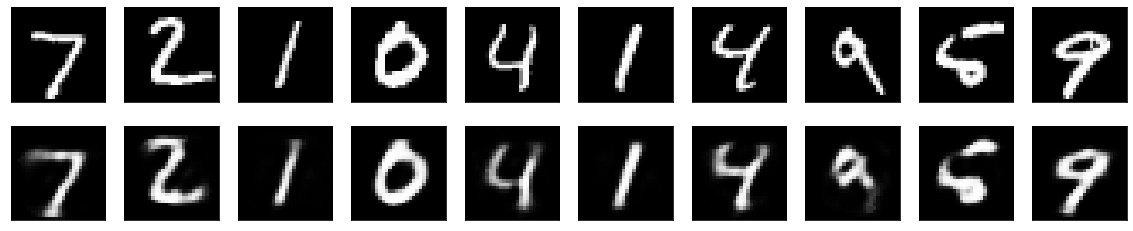

In [12]:
# use Matplotlib.
import matplotlib.pyplot as plt

n = 10 # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # disploay original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # diaplay reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

### Deep autoencoder

In [0]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [15]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train, epochs=100, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 34us/step - loss: 0.3292 - val_loss: 0.2652
Epoch 2/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.2561 - val_loss: 0.2469
Epoch 3/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.2399 - val_loss: 0.2311
Epoch 4/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.2165 - val_loss: 0.2018
Epoch 5/100
60000/60000 [==============================] - 2s 27us/step - loss: 0.1968 - val_loss: 0.1897
Epoch 6/100
60000/60000 [==============================] - 2s 27us/step - loss: 0.1858 - val_loss: 0.1797
Epoch 7/100
60000/60000 [==============================] - 2s 27us/step - loss: 0.1773 - val_loss: 0.1729
Epoch 8/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.1712 - val_loss: 0.1660
Epoch 9/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1661 - val_loss: 0.1

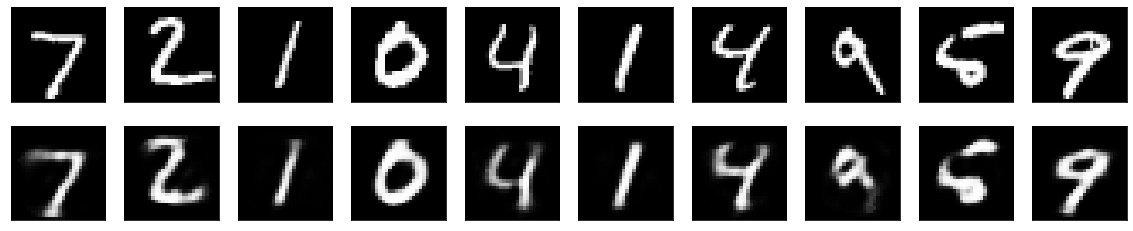

In [16]:
# use Matplotlib
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()